In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from scipy import stats as st
import seaborn as sns
%matplotlib inline

#### General Functions

In [2]:
def get_percent_of_na(df,num):
    count = 0
    df = df.copy()
    s = (df.isna().sum() / df.shape[0])
    for column, percent in zip(s.index,s.values):
        
        num_of_nulls = df[column].isna().sum()
        if num_of_nulls == 0:
            continue
        else:
            count += 1
        print('Column {} has {:.{}%} percent of Nulls, and {} of nulls'.format(column, percent,num,num_of_nulls))
        
    if count !=0:
        print('There are {} columns with NA!'.format(count))
    else:
        print()
        print('There are no columns with NA!')


def get_precent_of_na_df(df,num):
    df_nulls = pd.DataFrame(df.isna().sum(),columns=['Missing Values'])
    df_nulls['Percent of Nulls'] = round(df_nulls['Missing Values'] / df.shape[0],num) *100
    return df_nulls
        

def get_info(df):
    print('Head:')
    print()
    display(df.head())
    print ('-'*120)
    print('Info:')
    print()
    display(df.info())
    print ('-'*120)
    print('Describe:')
    print()
    display(df.describe())
    print ('-'*120)
    display(df.describe(include='object'))
    print()
    print('Columns with nulls:')
    display(get_precent_of_na_df(df,4))
    print ('-'*120)
    print('Shape:')
    print(df.shape)
    print ('-'*120)
    print('Duplicated:')
    print('We have {} duplicated rows!'.format(df.duplicated().sum()))

In [3]:
df = pd.read_csv('/datasets/games.csv')

# <font color ='yellow dark'> Step 1: Study General Information </font>

In [4]:
get_info(df)

Head:



,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


------------------------------------------------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

------------------------------------------------------------------------------------------------------------------------
Describe:



,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


------------------------------------------------------------------------------------------------------------------------


,Name,Platform,Genre,User_Score,Rating
count,16713,16715,16713,10014,9949
unique,11559,31,12,96,8
top,Need for Speed: Most Wanted,PS2,Action,tbd,E
freq,12,2161,3369,2424,3990



Columns with nulls:


,Missing Values,Percent of Nulls
Name,2,0.01
Platform,0,0.00
Year_of_Release,269,1.61
Genre,2,0.01
NA_sales,0,0.00
EU_sales,0,0.00
JP_sales,0,0.00
Other_sales,0,0.00
Critic_Score,8578,51.32
User_Score,6701,40.09


------------------------------------------------------------------------------------------------------------------------
Shape:
(16715, 11)
------------------------------------------------------------------------------------------------------------------------
Duplicated:
We have 0 duplicated rows!


### Conclusions And Actions:

<strong> Actions: </strong><br>
I can see that we have 3 columns with a lot of nulls: critic score, user score and rating, these columns need some further analysis in order to better understand how to fill the missing values.

Name column I can drop the two rows with no name since there is no way to fill that name with the other columns.
Since Genre column also has two missing values, maybe it is the same row, Therefore dropping these rows will not affect our anlaysis in a major way.

User Score column also has 2.4k wired values 'tbd', this column needs a further investigation.

Some columns needs data type change.

<strong> Conclusions: </strong><br>
The game 'Need for Speed: Most Wanted' is the most popular game with 12 releases to different platforms.

Platform PS2 is the most popular with a little more than 2k games.

Most playable Genre is Action and most rated score by ESRB is "E" which means playable by everyone!


# <font color ='yellow dark'> Step 2: Prepare the data </font>
#### <br>**Tasks:**
<ol>
    <li>Replace the column names (make them lowercase)</li>
    <li>Convert the data to the required types and describe the columns where the data types have been changed and why</li>
    <li>If necessary, decide how to deal with missing values</li>
    <li>Calculate the total sales in every region and put these values in a separate column</li>


</ol>

**Task 1:**

In [5]:
df.columns = df.columns.str.lower()

**Task 2:**

As I saw while studying the general info the columns: year_of_release and user_score needs a data type change.<br>
The column year_of_release is listed as float, will be changed to int to preserve memory.<br>
The column user_score should be float, since its type was object we might have some strings inside the column.

In [6]:
df['year_of_release'] = df['year_of_release'].astype('Int32')

In [7]:
df[df['user_score'].str.contains('[a-z]',regex=True,na=False)]['user_score'].value_counts()

tbd    2424
Name: user_score, dtype: int64

I can see that I only have only string in this column 'tbd', I will replace it with N

In [8]:
df['user_score'].replace('tbd',np.nan,inplace=True)
df['user_score'] = df['user_score'].astype(float)

**Task 3:**<br>
My method to deal with missing values for year_of_release will be like this:<br>
I will groupby the name of the game then fillna with the year of other platforms release. My assumption is that the gaming company releases the games for other platforms within the same year so that the platforms company will not lose customers that get all the games.
P.S for the groups with no release date at all, I will leave it NaN for the moment

In [9]:
df['year_of_release'] = df.groupby(['name'],sort=False)['year_of_release']\
                            .apply(lambda x: x.ffill().bfill())
df['year_of_release'].isna().sum()

148

__Handling name and genre__

I will just drop these two rows, this will not effect any analysis

In [10]:
df.dropna(subset=['name','genre'],inplace=True)

**Handling crit_score, user_score and rating** <br><br>
Since I have to identify patterns that determines whether a game succeeds or not having scores is a crucial thing.
Therefore I allow myself to keep the indices of these rows where they both are NaN in case I need to drop them later.

In [11]:
indices = df[(df['critic_score'].isna()) & (df['user_score'].isna())].index

In [12]:
df.query('index in @indices')['year_of_release'].describe()

count    7921.000000
mean     2005.516854
std         7.095969
min      1980.000000
25%      2000.000000
50%      2008.000000
75%      2010.000000
max      2016.000000
Name: year_of_release, dtype: float64

I thought that maybe because the games are too old we do not have the current rating. After investigating the years of these games I can clearly see that this is not case since the median is 2008 and the earliest game was in the 80's

To fill Rating I tried to search several games rating from the offical site of ESRB <a href="https://www.esrb.org/search/?searchKeyword=LMA%20Manager%202007&platform=All%20Platforms&rating=E%2CE10%2B%2CT%2CM%2CAO&descriptor=All%20Content&pg=1&searchType=All">link </a> but I could not find any match. Therefore I will fill all NA with "E" which means playable by everyone with the assumption that if it is was not filled then there are no limitations.

In [13]:
df['rating'].fillna('E',inplace=True)

**Task 4:**

In [14]:
df['total_sales'] = df.loc[:,df.columns.str.contains('sales')].sum(axis=1)
df.head(1)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54


# <font color ='yellow dark'> Step 3: Analyze the data </font>
#### <br>**Tasks:**
<ol>
    <li>Look at how many games were released in different years. Is the data for every period significant?</li>
    <li>Look at how sales varied from platform to platform. Choose the platforms with the greatest total sales and build a distribution based on data for each year. Find platforms that used to be popular but now have zero sales. How long does it generally take for new platforms to appear and old ones to fade?</li>
    <li>Determine what period you should take data for. To do so, look at your answers to the previous questions. The key criterion is that the data should allow you to build a prognosis for 2017.</li>
    <li>Which platforms are leading in sales? Which ones are growing or shrinking? Select several potentially profitable platforms. </li>
    <li>Build a box plot for the global sales of each game, broken down by platform. Are the differences in sales significant? What about average sales on various platforms? Describe your findings. </li>
    <li> Take a look at how user and professional reviews affect sales for a particular popular platform. Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.</li>
    <li>Keeping your conclusions in mind, compare the sales of the same games on other platforms. </li>
    <li>Take a look at the general distribution of games by genre. What can we say about the most profitable genres? Can you generalize about genres with high and low sales? </li>


</ol>

**Task 1:**

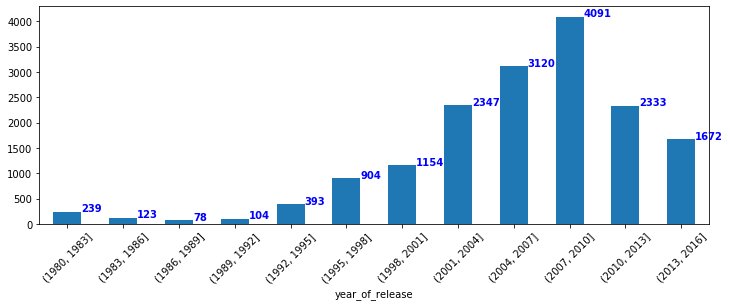

In [15]:
bins = np.arange(df['year_of_release'].min(),df['year_of_release'].max()+1,3)
bar_plot = df.groupby(pd.cut(df['year_of_release'],bins=bins)).agg({'year_of_release':'count'})
ax = bar_plot.plot(kind='bar', rot=45, figsize=(12,4),legend=False)
for i, v in enumerate(bar_plot.iloc[:,0].values):
    ax.text(i + .25,v + 3, str(v), color='blue', fontweight='bold')

**Conclusion: <br>**
I can clearly see that prior to 1995 there are barely any games. After 1995 I can see a drastic increase till around 2010 then we have some decrease with releases of new games.

**Task2:**<br>
Look at how sales varied from platform to platform. Choose the platforms with the greatest total sales and build a distribution based on data for each year. Find platforms that used to be popular but now have zero sales. How long does it generally take for new platforms to appear and old ones to fade?


Since we have a lot of platforms with the same meaning I will create a dicionary to categorize them. For later use.

In [16]:
df['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [17]:
category_platform = {'Wii':'Wii','NES':'Nintendo','GB':'Game Boy','DS':'Nintendo','X360':'Xbox','PS3':'PS','PS2':'PS','SNES':'Nintendo','GBA':'Game Boy'
                                ,'PS4':'PS','3DS':'Nintendo','N64':'Nintendo','PS':'PS','XB':'Xbox','PC':'PC','2600':'Atari','PSP':'PS','XOne':'Xbox'
                                ,'WiiU':'Wii','GC':'Nintendo','GEN':'Other','DC':'DC','PSV':'SP','SAT':'SAT','SCD':'PC','WS':'Box Game','NG':'Nintendo'
                                ,'TG16':'PC','3DO':'Other','GG':'Other','PCFX':'PC'}

In [18]:
from collections import Counter
Counter(category_platform.values()).most_common()

[('Nintendo', 7),
 ('PS', 5),
 ('PC', 4),
 ('Xbox', 3),
 ('Other', 3),
 ('Wii', 2),
 ('Game Boy', 2),
 ('Atari', 1),
 ('DC', 1),
 ('SP', 1),
 ('SAT', 1),
 ('Box Game', 1)]

In [19]:
df['platform_category'] = df['platform'].replace(category_platform)

In [20]:
def plot_bar(df,x,y,column='',value='',func='sum'):
    if column != '' and value != '':
        filter_df = df[df[column] == value]
        plot_df = filter_df.pivot_table(index=x,values=y,aggfunc=func)
        values_to_plot = plot_df[y].values
    else:
        plot_df = df.pivot_table(index=x,values=y,aggfunc=func)
        values_to_plot = plot_df[y].values
        
    ax= plot_df.plot(kind='bar',figsize=(12,6),rot=45,title=value,legend=False)

    for i, v in enumerate(values_to_plot):
        ax.text(i,v + 3, str(round(v)), color='blue', fontweight='bold')

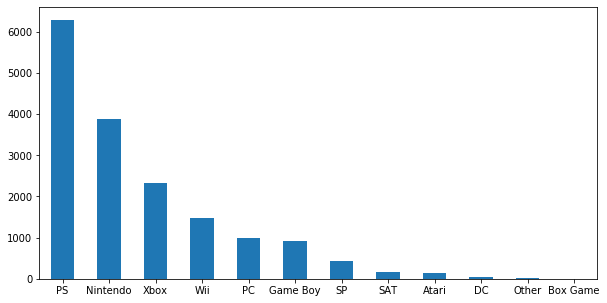

In [22]:
df['platform_category'].value_counts().plot(kind='bar',figsize=(10,5),rot=0)

In [23]:
df_sales = df.pivot_table(index='platform',values='total_sales',aggfunc='sum').sort_values(by='total_sales',ascending=False).head()
df_sales

,total_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12


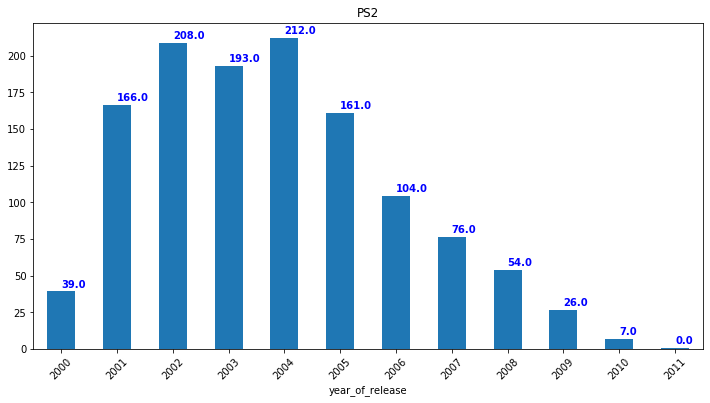

In [24]:
plot_bar(df,'year_of_release','total_sales','platform','PS2')

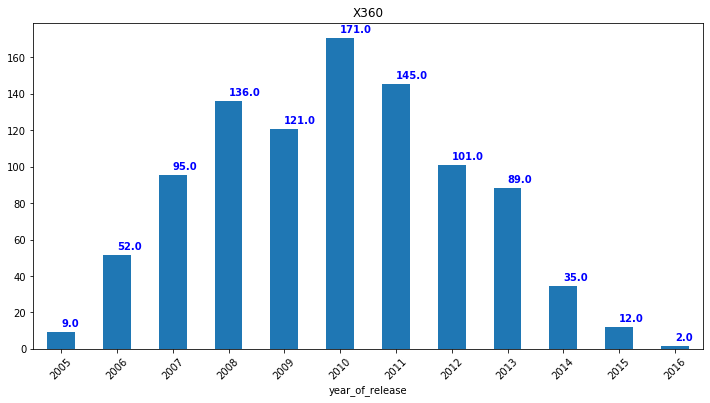

In [25]:
plot_bar(df,'year_of_release','total_sales','platform','X360')

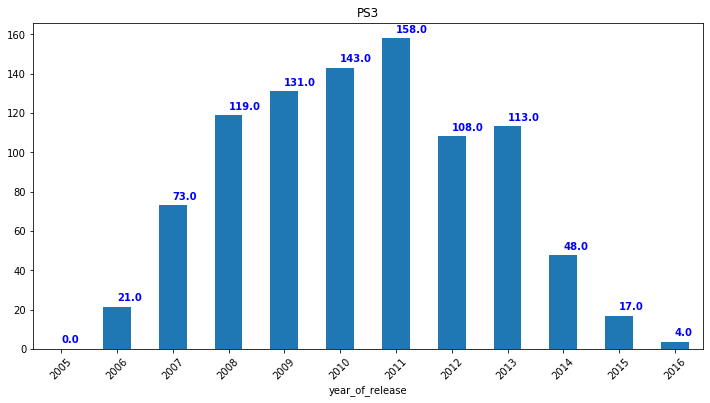

In [26]:
plot_bar(df,'year_of_release','total_sales','platform','PS3')

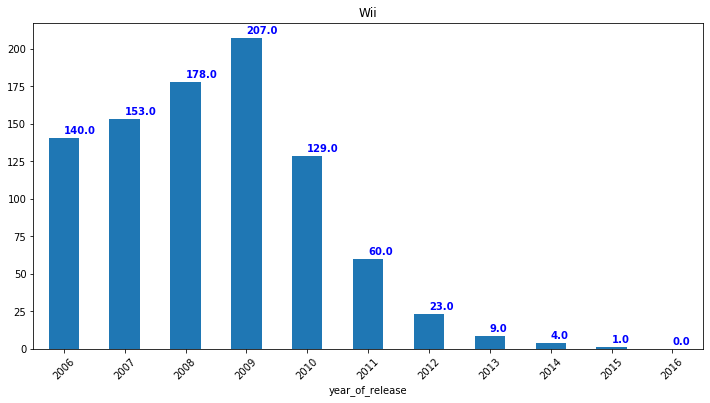

In [27]:
plot_bar(df,'year_of_release','total_sales','platform','Wii')

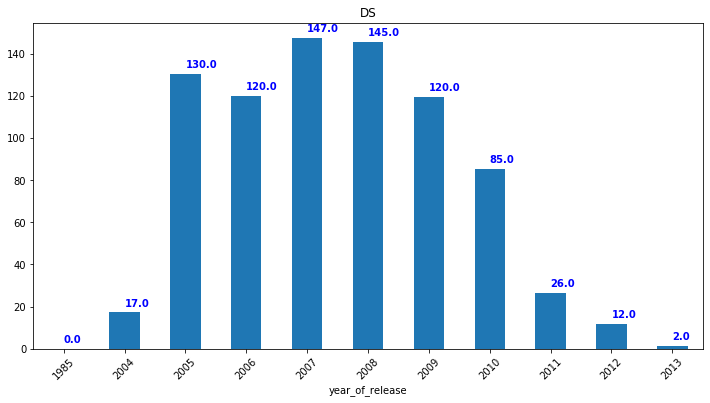

In [28]:
plot_bar(df,'year_of_release','total_sales','platform','DS')

**Conclusion: <br>**
I can see the the top platform category is PS with the biggest releases even though Nintendo has the more platforms!<br>
The most releases per platform are:<br>
1. PS2
2. X360
3. PS3
4. Wii
5. DS

Two of them related to PS category.<br>
When I investigated the released per year I could notice a life span of approximately 5-6 year per console.<br>
About PS we can understand it due to the fact they release a new console every 6 years so once they release the next console the gaming companys start to create games for the new console while slowly dumping the old ones.

Same thing goes for Xbox consoles, they release need ones every period of time. 

About Wii console we can see it started with a boomb when it was release (2006) more than any other platform but over the years this console died and no more games releases to this console. This could happen due to the fact the PS and Xbox consoles are more trendy these days and they release new console more often.

**Task 3:**<br>
Determine what period you should take data for. To do so, look at your answers to the previous questions. The key criterion is that the data should allow you to build a prognosis for 2017.

Since I saw that companys mostly release a new platform every a specific period of 5-6 years I will take the 6 last years which means 2010-2016

In [29]:
df_new_years = df[(df['year_of_release'] >= 2010) & (df['year_of_release'].notnull())]

**Task 4:** <br>
Which platforms are leading in sales? Which ones are growing or shrinking? Select several potentially profitable platforms.

In [30]:
df_new_years.pivot_table(index='platform',values='total_sales',aggfunc='sum')\
                .sort_values(by='total_sales',ascending=False).head(6)

,total_sales
platform,
PS3,590.65
X360,553.30
PS4,314.14
3DS,258.53
Wii,225.06
XOne,159.32


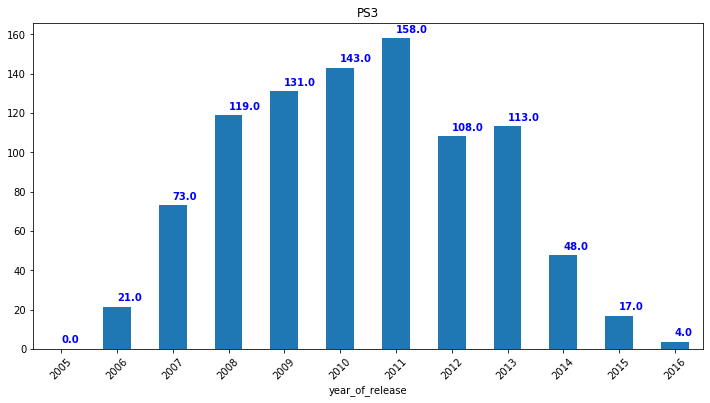

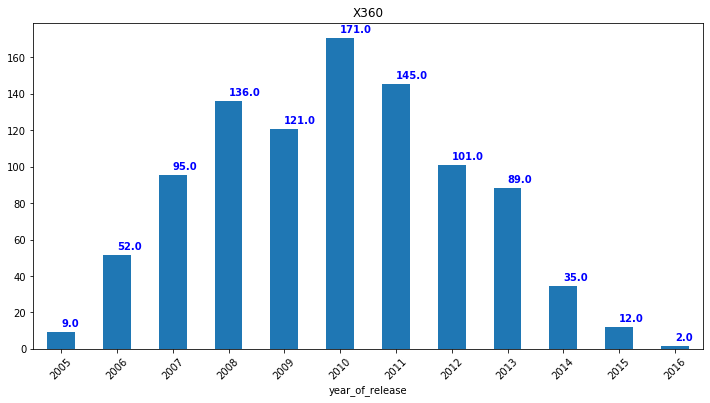

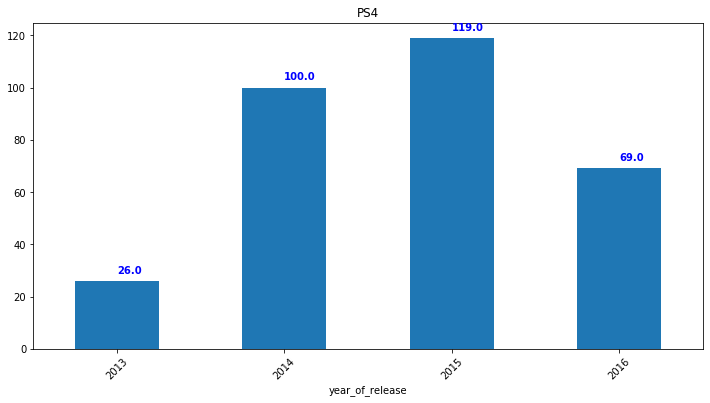

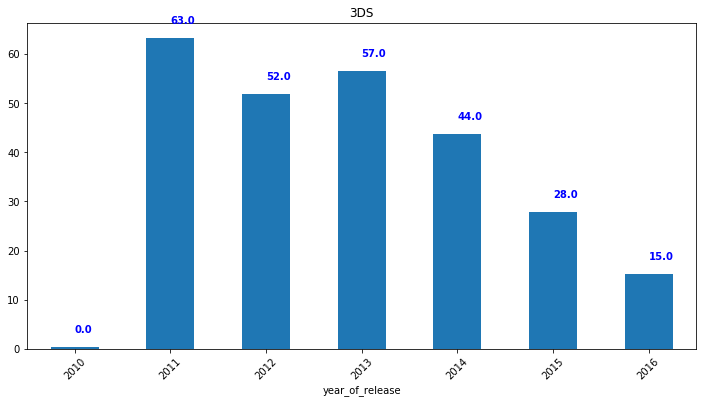

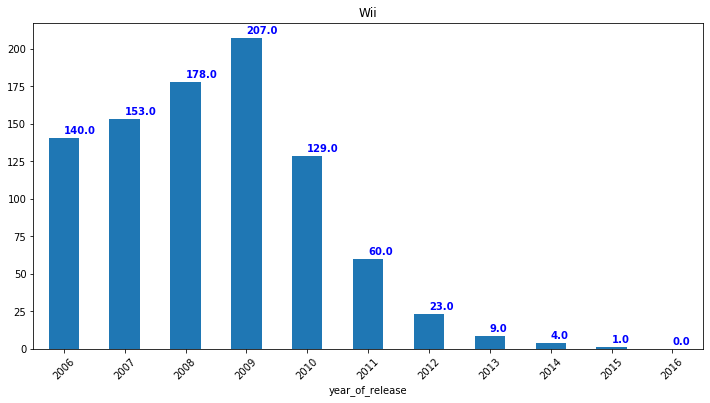

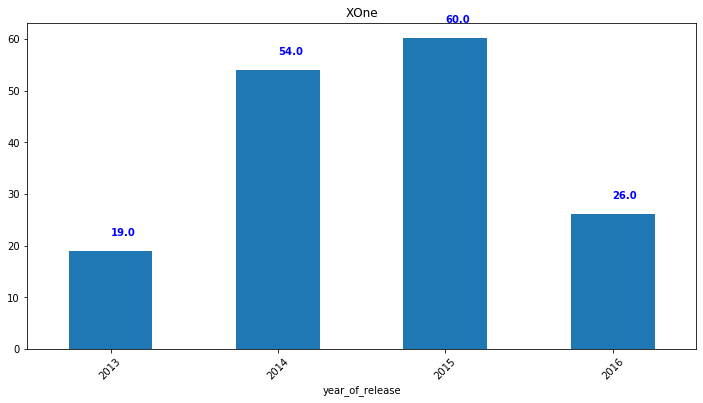

In [31]:
for platform in ['PS3','X360','PS4','3DS','Wii','XOne']:
    plot_bar(df,'year_of_release','total_sales','platform',platform)
    plt.show()

**Conclusion: <br>**
I can see that from the graphs PS3 is the leading console up to 2016. Although after checking, PS4 and XOne were only released at 2013 therefore we can see a drop of game released for PS3 and X360. 

I assume that for 2017 gaming company are going to release new games for PS4 and XOne since they are the dominator platforms until the PS5 will be released and the new Xbox.

We can expect that games for PS3 and X360 at the year 2017 will continue to drop since is it not profitable.

**Task 5:** <br>
Build a box plot for the global sales of each game, broken down by platform. Are the differences
 in sales significant? What about average sales on various platforms? Describe your findings. 
 
Since by 2016 my findings lead me to understand that not all of the platforms are relevat I will look only in the next one: PS4, XOne

In [32]:
df_ps4 = df.query('platform == "PS4"')
df_xone = df.query('platform == "XOne"')

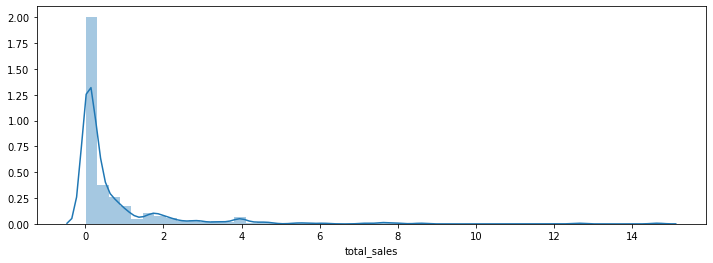

In [33]:
plt.figure(figsize=(12,4))
sns.distplot(df_ps4['total_sales'])

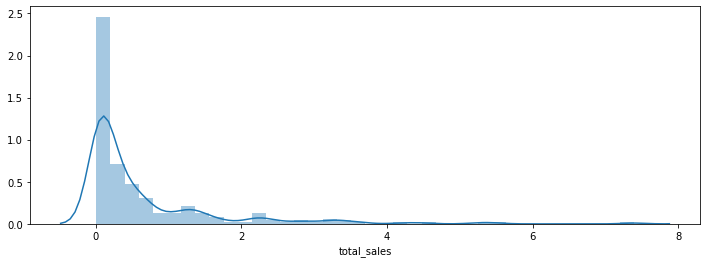

In [34]:
plt.figure(figsize=(12,4))
sns.distplot(df_xone['total_sales'])

I can see that both of them are skewed to the left, which means that the mean is greater than the median.

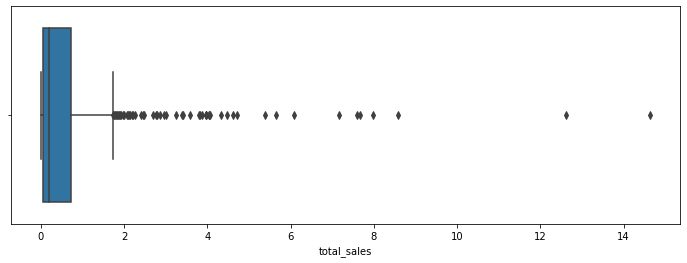

In [35]:
plt.figure(figsize=(12,4))
sns.boxplot(df_ps4['total_sales'])

In [36]:
display(df_ps4.sort_values(by='total_sales',ascending=False).head())
print('-'*100)
display(df_ps4.sort_values(by='total_sales',ascending=False).tail())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,platform_category
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,E,14.63,PS
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62,PS
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58,PS
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,E,7.98,PS
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66,PS


----------------------------------------------------------------------------------------------------


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,platform_category
15943,Professional Farmer 2016,PS4,2015,Action,0.00,0.01,0.0,0.0,NaN,NaN,E,0.01,PS
15864,Rocksmith 2014 Edition Remastered,PS4,2016,Misc,0.01,0.00,0.0,0.0,NaN,7.8,T,0.01,PS
15839,Mark McMorris Infinite Air,PS4,2016,Sports,0.01,0.00,0.0,0.0,49.0,6.0,T,0.01,PS
15790,This War of Mine,PS4,2016,Action,0.00,0.01,0.0,0.0,NaN,NaN,E,0.01,PS
16585,Farming 2017 - The Simulation,PS4,2016,Simulation,0.00,0.01,0.0,0.0,NaN,NaN,E,0.01,PS


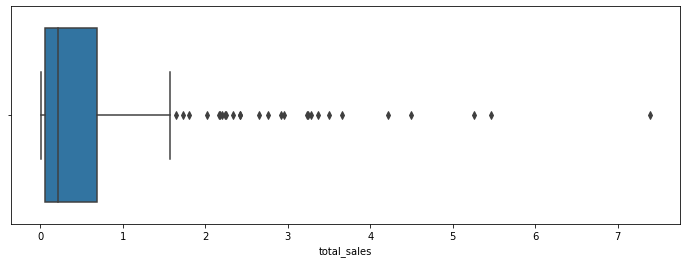

In [37]:
plt.figure(figsize=(12,4))
sns.boxplot(df_xone['total_sales'])

In [38]:
display(df_xone.sort_values(by='total_sales',ascending=False).head())
print('-'*100)
display(df_xone.sort_values(by='total_sales',ascending=False).tail())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,platform_category
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,E,7.39,Xbox
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47,Xbox
179,Call of Duty: Advanced Warfare,XOne,2014,Shooter,3.22,1.55,0.01,0.48,81.0,5.4,M,5.26,Xbox
242,Halo 5: Guardians,XOne,2015,Shooter,2.78,1.27,0.03,0.41,84.0,6.4,T,4.49,Xbox
270,Fallout 4,XOne,2015,Role-Playing,2.51,1.32,0.01,0.38,88.0,6.2,M,4.22,Xbox


----------------------------------------------------------------------------------------------------


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,platform_category
16066,Assetto Corsa,XOne,2016,Racing,0.00,0.01,0.0,0.0,63.0,6.7,E,0.01,Xbox
16035,Pac-Man Championship Edition 2 + Arcade Game S...,XOne,2016,Action,0.01,0.00,0.0,0.0,NaN,NaN,E,0.01,Xbox
16015,Mark McMorris Infinite Air,XOne,2016,Sports,0.01,0.00,0.0,0.0,NaN,7.1,T,0.01,Xbox
16013,Dead Rising 2,XOne,2016,Action,0.01,0.00,0.0,0.0,NaN,NaN,M,0.01,Xbox
16672,Metal Gear Solid V: The Definitive Experience,XOne,2016,Action,0.01,0.00,0.0,0.0,NaN,NaN,M,0.01,Xbox


As suspected the mean is greater than the median which means we have some regions or games with much higher sales over other games.<br>
I could see that highest sales for game for PS4 is COD with almost 15m sales and for XOne is also COD with almost 7.5m sales.

On the other hand the games with the least sale have around 0.01m sales which is a big difference therefore we have such a huge gap between mean, median.

**Task 6:**<br>
    Take a look at how user and professional reviews affect sales for a particular popular platform. 
Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.

I will look into the PS4 reviews since it is the most popular and active platform as for this data.<br>
First of all I have to check if critics and users have the same ranking method, I think I need to normalize it (different scales). <br>
After I normalize I will calculate the mean score of critics and users

In [39]:
df_ps4.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,platform_category
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,E,14.63,PS
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62,PS
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58,PS
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,E,7.98,PS
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66,PS


In [40]:
df_ps4['critic_score'].describe()

count    252.000000
mean      72.091270
std       12.485992
min       19.000000
25%       66.000000
50%       73.000000
75%       80.000000
max       97.000000
Name: critic_score, dtype: float64

In [41]:
df_ps4['user_score'].describe()

count    257.000000
mean       6.748249
std        1.459481
min        1.500000
25%        6.100000
50%        7.000000
75%        7.800000
max        9.200000
Name: user_score, dtype: float64

As suspected, different scales.

In [42]:
df_ps4['critic_score'] = df_ps4['critic_score'] / 10

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [43]:
df_ps4['mean_score'] = (df_ps4['critic_score'] + df_ps4['user_score']) / 2

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


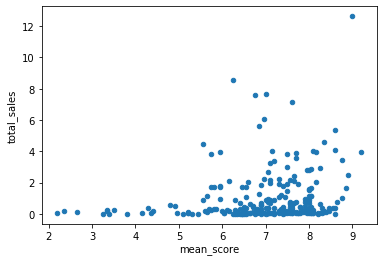

In [44]:
df_ps4_no_null = df_ps4.dropna(subset=['mean_score'])
df_ps4_no_null.plot(x='mean_score',y='total_sales',kind='scatter')

In [45]:
np.corrcoef(df_ps4_no_null['mean_score'],df_ps4_no_null['total_sales'])

array([[1.        , 0.19233841],
       [0.19233841, 1.        ]])

As can see for this particular platform the reviews does not affect on the sales.<br>
We get a low correlation of almost 0.2 And from the graph we can see that for some games we have high mean score but really low sales.

**Task 7:** <br>
Keeping your conclusions in mind, compare the sales of the same games on other platforms.

In [46]:
#get the names of games with more than one platform
good_names = set(df_new_years.groupby(['name']).filter(lambda x: x.shape[0]>1)['name'])

In [47]:
#groupby 
dd = df_new_years.query('name in @good_names').groupby(['name','platform'])\
        .agg({'total_sales':'sum'})
dd

total_sales
name                             platform             
 Frozen: Olaf's Quest            3DS              0.59
                                 DS               0.51
2010 FIFA World Cup South Africa PS3              1.23
                                 PSP              0.46
                                 Wii              0.43
...                                                ...
pro evolution soccer 2011        PSP              0.80
                                 Wii              0.22
                                 X360             0.60
uDraw Studio: Instant Artist     Wii              0.17
                                 X360             0.02

[3073 rows x 1 columns]

Since I have alot of values I will be taking only those with more than 6m total sales for a good comparison

In [48]:
dd[dd['total_sales'] >6]

total_sales
name                                platform             
Assassin's Creed III                PS3              6.44
Battlefield 3                       PS3              7.17
                                    X360             7.32
Call of Duty: Advanced Warfare      PS4              7.66
Call of Duty: Black Ops             PS3             12.63
                                    X360            14.62
Call of Duty: Black Ops 3           PS4             14.63
                                    XOne             7.39
Call of Duty: Black Ops II          PS3             13.79
                                    X360            13.68
Call of Duty: Ghosts                PS3              9.36
                                    X360            10.24
Call of Duty: Modern Warfare 3      PS3             13.33
                                    X360            14.73
Donkey Kong Country Returns         Wii              6.45
FIFA 12                             PS3              6.64
FIFA 14                             PS3              6.46
FIFA 15                             PS4              6.08
FIFA 16                             PS4              8.58
FIFA 17                             PS4              7.60
FIFA Soccer 13                      PS3              8.17
Fallout 4                           PS4              7.17
Grand Theft Auto V                  PS3             21.05
                                    PS4             12.62
                                    X360            16.27
Just Dance 3                        Wii             10.12
Just Dance 4                        Wii              6.76
Minecraft                           X360             9.18
Red Dead Redemption                 PS3              6.48
                                    X360             6.32
Star Wars Battlefront (2015)        PS4              7.98
Super Smash Bros. for Wii U and 3DS 3DS              7.55
The Elder Scrolls V: Skyrim         PS3              6.40
                                    X360             8.79
Zumba Fitness                       Wii              6.70

I can see that from the games that were released for more than one platform PS is the dominator.

**Task 8:** <br>
Take a look at the general distribution of games by genre. What can we say about 
the most profitable genres? Can you generalize about genres with high and low sales?

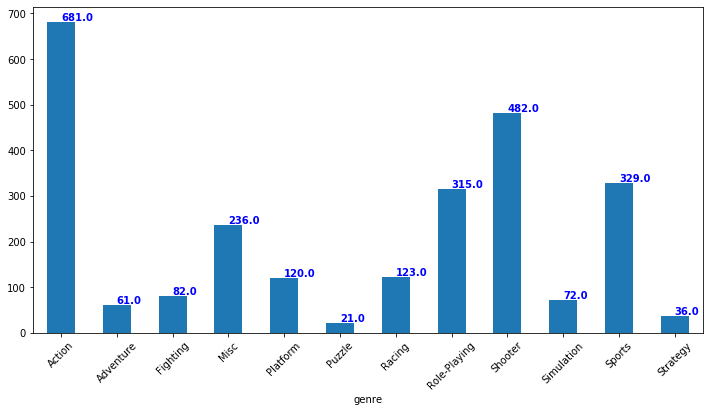

In [49]:
plot_bar(df_new_years,'genre','total_sales')

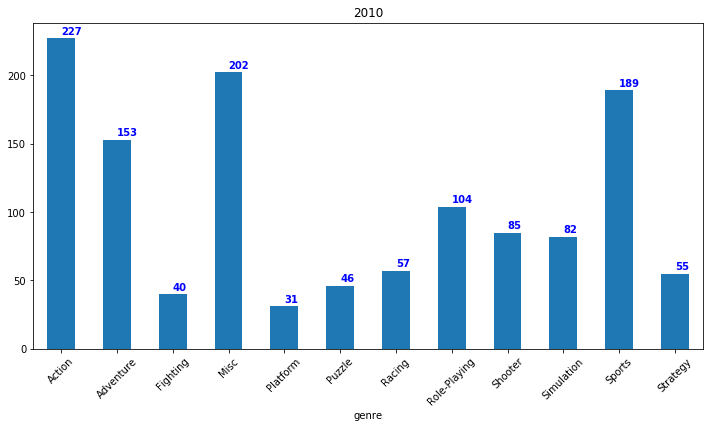

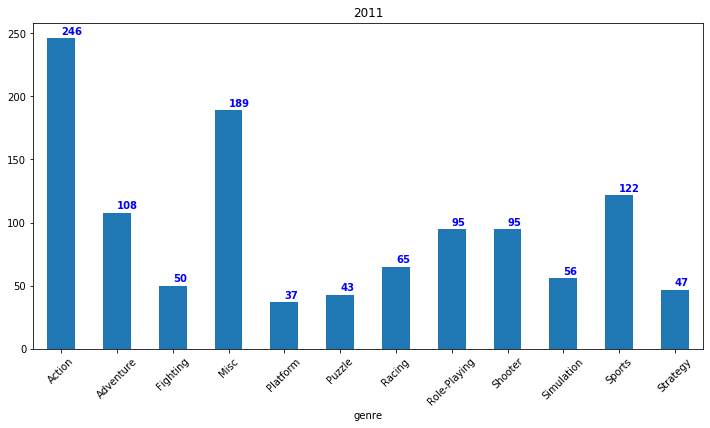

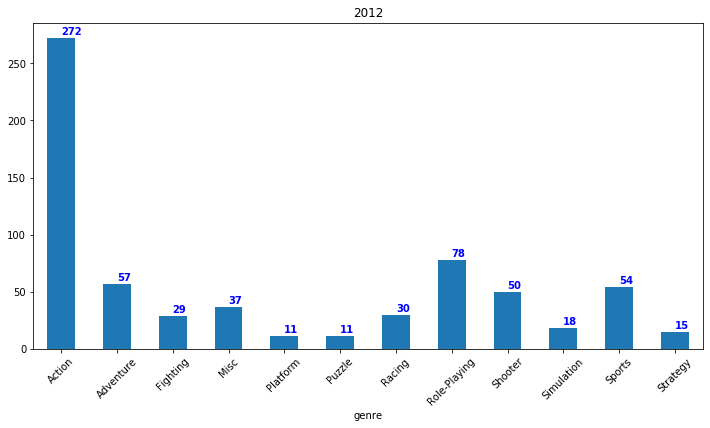

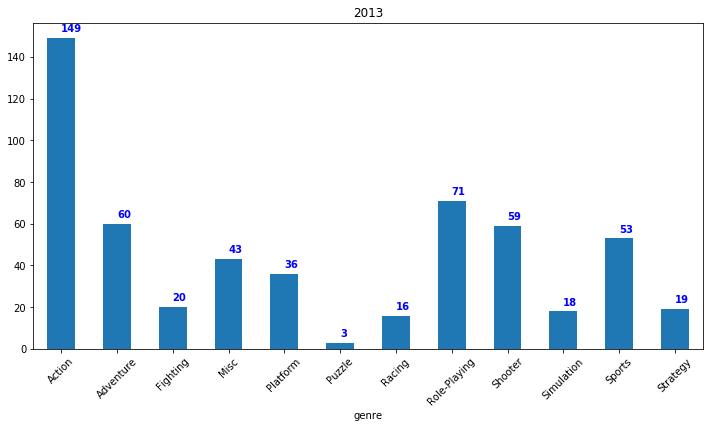

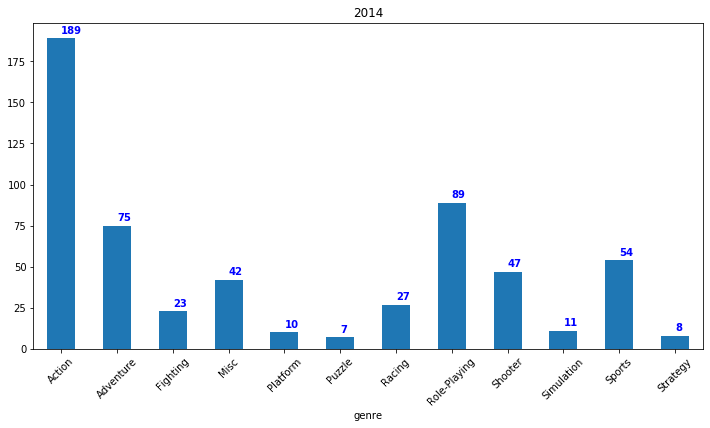

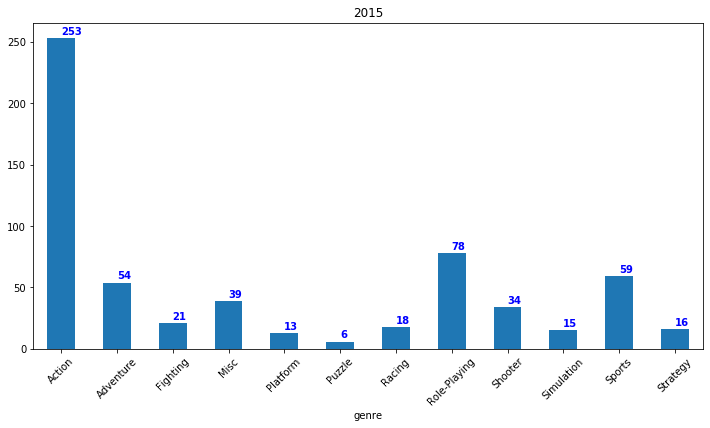

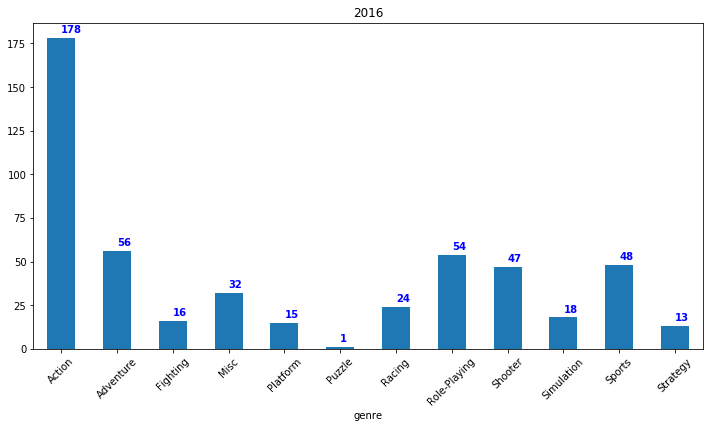

In [50]:
years = [2010,2011,2012,2013,2014,2015,2016]

for year in years:
    plot_bar(df_new_years,'genre','total_sales',column='year_of_release',value=year,func='count')
    plt.show()

I can see that most profitable genres are action, shooter and sports. <br>
I can see that for action games they sold almost double more games than sports, it clearly says that action games are the most profitable genre. 


After 2012 I can see a big difference between the action games made to the others. Action which explains why it is selling more, we have more games from this genre

# <font color ='yellow dark'> Step 4: Create a user profile for each region </font>
#### <br>**Tasks:**
For each region (NA, EU, JP), determine:
<ol>
    <li>The top five platforms. Describe variations in their market shares from region to region</li>
    <li>The top five genres. Explain the difference</li>
    <li>Do ESRB ratings affect sales in individual regions? </li>



</ol>

In [51]:
regions = ['na_sales','eu_sales','jp_sales']

for region in regions:
    display(df_new_years.pivot_table(index='platform',values=region,aggfunc='sum')\
                        .sort_values(by=region,ascending=False).head())
    print('-'*100)

,na_sales
platform,
X360,335.93
PS3,230.47
Wii,122.68
PS4,108.74
XOne,93.12


----------------------------------------------------------------------------------------------------


,eu_sales
platform,
PS3,214.74
X360,164.29
PS4,141.09
PC,70.50
Wii,66.35


----------------------------------------------------------------------------------------------------


,jp_sales
platform,
3DS,100.64
PS3,59.36
PSP,42.44
DS,27.90
PSV,21.84


----------------------------------------------------------------------------------------------------


I can see that for every region we have different choice by the people.<br>
The top one for NA is xbox for EU is PS and for JP is Nintendo.<br>

As for North America first choice being X360 I can understand that they are slowly upgrade to new platforms since XOne is more newer than this platform, For Europe they move ahead since PS4 is the third choice and for Japan they are kinda in the middle of moving towards new platforms

In [53]:
regions = ['na_sales','eu_sales','jp_sales']

for region in regions:
    display(df_new_years.pivot_table(index='rating',values=region,aggfunc='sum')\
                        .sort_values(by=region,ascending=False).head())
    print('-'*100)

,na_sales
rating,
E,429.27
M,384.23
E10+,161.61
T,161.21
EC,1.13


----------------------------------------------------------------------------------------------------


,eu_sales
rating,
E,337.51
M,294.29
T,113.29
E10+,101.16
RP,0.03


----------------------------------------------------------------------------------------------------


,jp_sales
rating,
E,219.68
T,42.14
M,30.47
E10+,13.22
EC,0.00


----------------------------------------------------------------------------------------------------


We can see that dominator is E which is games for everyone. Rest are all for ages 10+ so I cant clearly see if a specific rating affect the sales.

# <font color ='yellow dark'> Step 5: Test hypotheses </font>

**Task 1:**<br>
Test: Average user ratings of the Xbox One and PC platforms are the same.

In [54]:
# Null hypothesis = The average user rationg of the xboxone is equal to pc platform users (mu_xboxone == mu_pc)
# Alternative Hypothesis = The average user rationg of the xboxone is not equal to pc platform users (mu_xboxone != mu_pc)

alpha = 0.05

sample_xboxone = df_new_years.query('platform == "XOne"')['user_score']
sample_pc = df_new_years.query('platform == "PC"')['user_score']

sample_xboxone.mean(), sample_pc.mean()

(6.521428571428572, 6.529242819843342)

In [55]:
results = st.ttest_ind(
        sample_xboxone, 
        sample_pc,equal_var=False,nan_policy ='omit')

if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

We can't reject the null hypothesis


Just looking at the means we saw that they are really close, so that we got that can not reject the null hypothesis is a good thing and I can conclude that with confidence level of 0.05 the average score of users for Xone platform is equal to the users score for PC.

**Task 2:**<br>
Test: Average user ratings for the Action and Sports genres are different.

In [56]:
# Null hypothesis = The average user rationg of action genre is equal to sports genre (mu_action == mu_sports)
# Alternative Hypothesis = The average user rationg of action genre is not equal to sports genre (mu_action != mu_sports)

alpha = 0.05

sample_action = df_new_years.query('genre == "Action"')['user_score']
sample_sports = df_new_years.query('genre == "Sports"')['user_score']

sample_action.mean(), sample_sports.mean()

(6.7897597977244, 5.9)

In [57]:
results = st.ttest_ind(
        sample_action, 
        sample_sports,equal_var=False,nan_policy ='omit')

#Because we have two tailed I am dividing alpha which means we have 2.5% each side.
if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

We reject the null hypothesis


Just looking at the means we saw that they are not so close. We rejected the null hypothesis so I can conculde that with confidence level of 0.05 the averange rating for action genre is not equal to sports genre.

# <font color ='yellow dark'> Step 6: General Conclusion </font>

When studying the general information I understood that we had some missing values, different data types which I had
to take care of.

While preparing the data that some missing values such year for game release are no where to be found in my data
so I had to leave them blank, but later in the project I did not use them at all.
I did drop two rows where name and genre were NA.

Analyzing the data I could understand that every platform has a life span that lasts around 6 years then the companies
release a newer version of the console. During the years 2007-2010 we had the most of game releases probably the reason
for this is that a lot more platforms were release simultaneously.

The platform that sold the most was PS2 but it died around 2011 which is when PS3 had the best sales, I can understand
from this that the gaming companies switched from creating games for PS2 to PS3.

When I kept investigating I took only years from 2010+ because of the life span. While investigating PS4 rating by
critis and users I noticed that the review does not impact on selling. I could see games with mean rating of
8-9 and sales like games with rating less than 5.

Once checking the games that were released for more than one platform I could clearly see that PS is the dominator
platform with total sales. Action genre is the most popular by far with release, second place is shooter and third
are sports game.

For the regions I could see every region has its own preference for number one in sales NA --> x360
EU --> PS3 and JP --> 3DS.

To summary: I think its the best for gaming companies to continue we release for the platform PS4 since 
the followers of PS3 will continue to buy and upgrading use the next generation platform. Also, for every region 
it was first or second place for selling. By that I guess they should also produce Xone games because it is
the direct competitor of PS4.